In [1]:
import sys
sys.path.append('./../../')

In [2]:
import ikamoana.fisherieseffort.fisherieseffort as fe
import pandas as pd

filepath = "./../../data/fisheries_effort/skj_fisheries_data_2021_Nov17.txt"

In [3]:
fisheries_df = fe.readFile(filepath, header_position=0, columns_name=None)
fisheries_df = fe.removeEmptyEntries(fisheries_df,verbose=True)
# OPTIONAL :
fisheries_df = fe.removeNoCatchEntries(fisheries_df,verbose=True)
# -------- #

Removed 17845 empty entries.
Number of empty entries per fishery :
 f         1    2   5    7     8     9   10  12
empty  12813  518  18  135  1933  2424   2   2

Removed 340907 entries without catch.
Number of entries without catch per fishery :
 f            1      2     3     4      5     6      7      8     9      10  \
no catch  19494  14085  6125  7349  17521  1189  12956  87199  5094  23734   

f             12     13    15  
no catch  110346  31246  4569  


In [4]:
fisheries_dict = fe.separateFisheries(fisheries_df)
# OPTIONAL :
fisheries_dict = fe.predictEffortAllFisheries(fisheries_dict)
# -------- #

---
# Some plots

In [12]:
fisheries_df_modified = pd.concat([value for value in fisheries_dict.values()])

print("NO EFFORT : ",end='')
print(len(fisheries_df_modified[(fisheries_df_modified['E']==0) & (fisheries_df_modified['C']!=0)]))
print("NO CATCH : ",end='')
print(len(fisheries_df_modified[(fisheries_df_modified['E']!=0) & (fisheries_df_modified['C']==0)]))
print("NO EFFORT AND NO CATCH : ",end='')
print(len(fisheries_df_modified[(fisheries_df_modified['C']==0) & (fisheries_df_modified['E']==0)]))

NO EFFORT : 0
NO CATCH : 0
NO EFFORT AND NO CATCH : 0


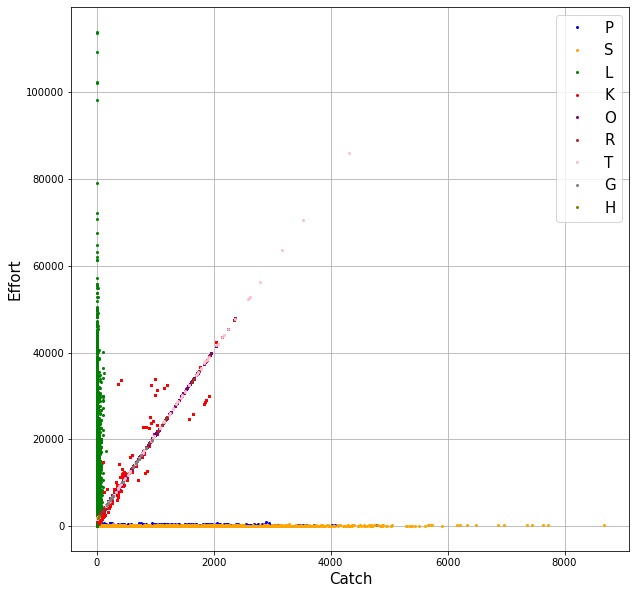

In [13]:
fe.plotByGear(fisheries_df_modified)

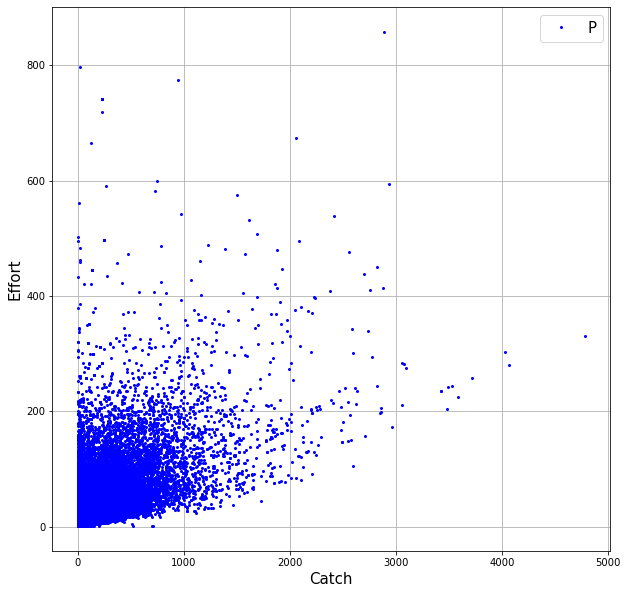

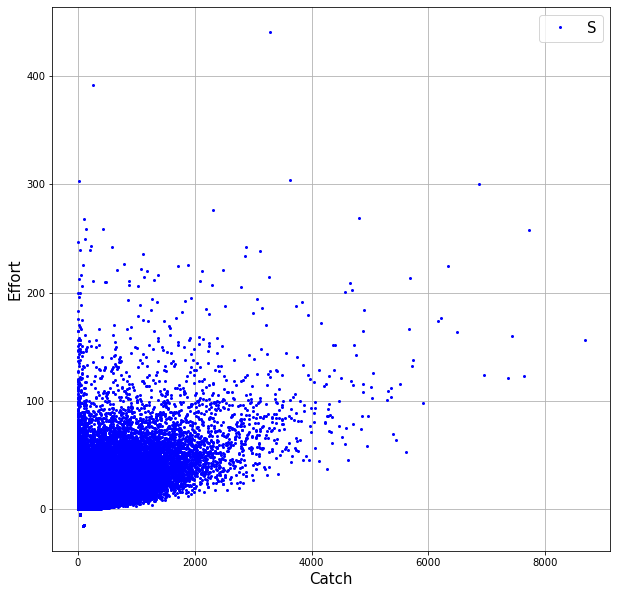

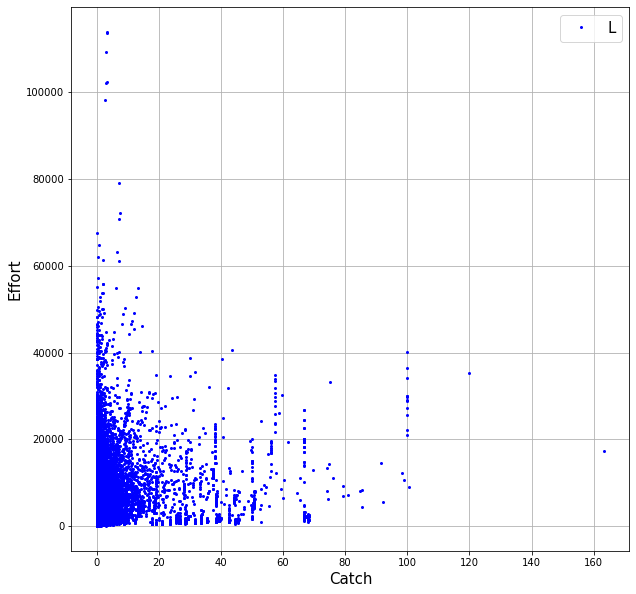

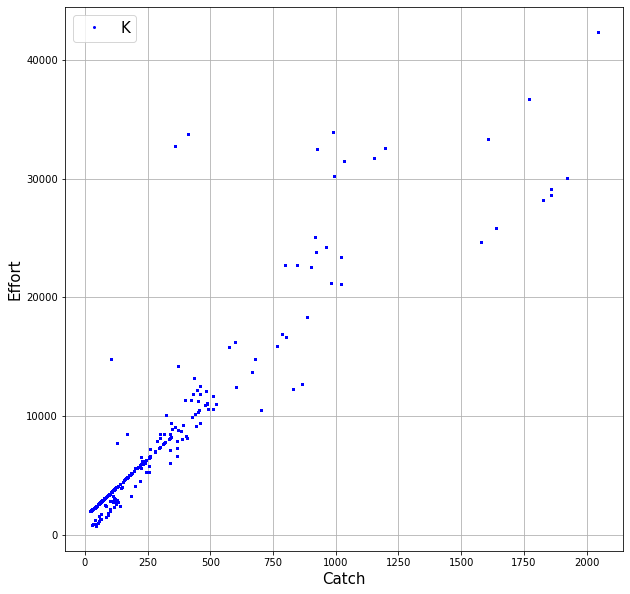

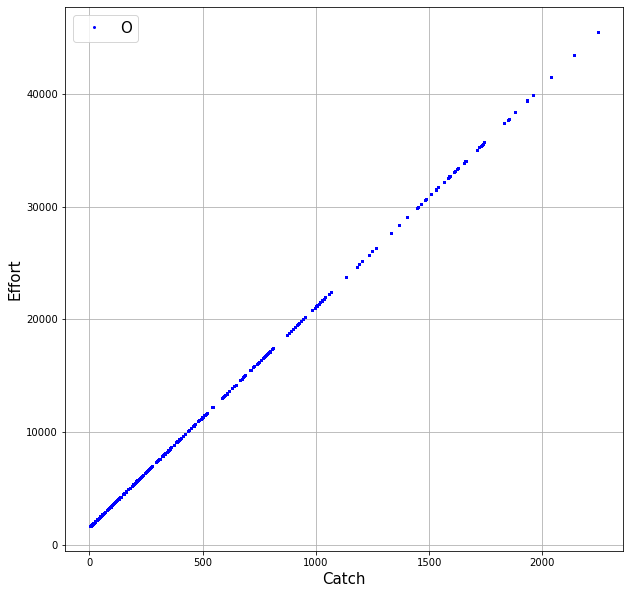

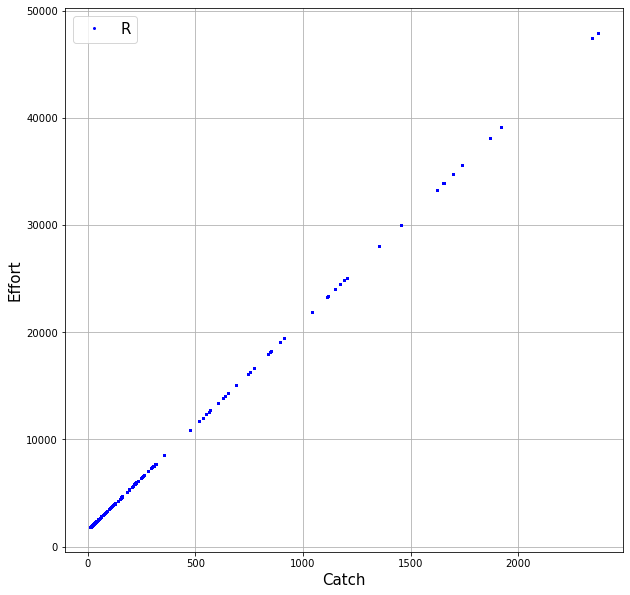

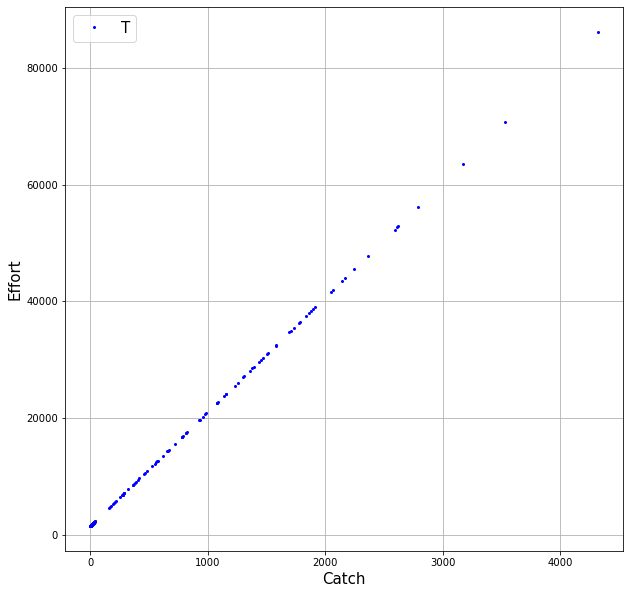

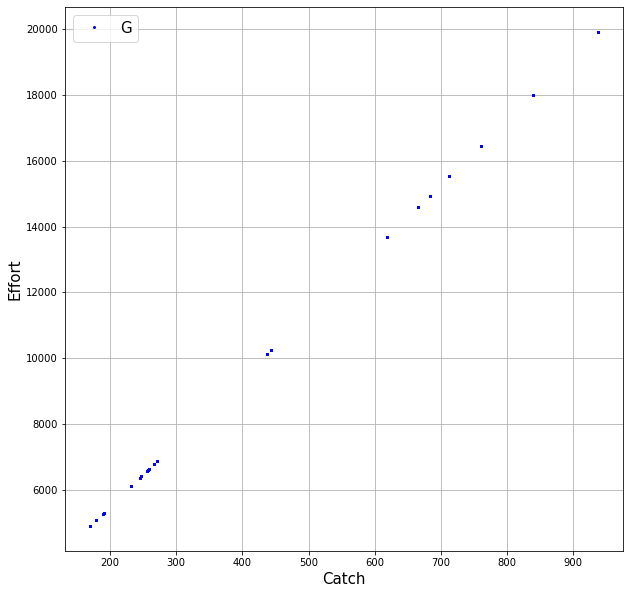

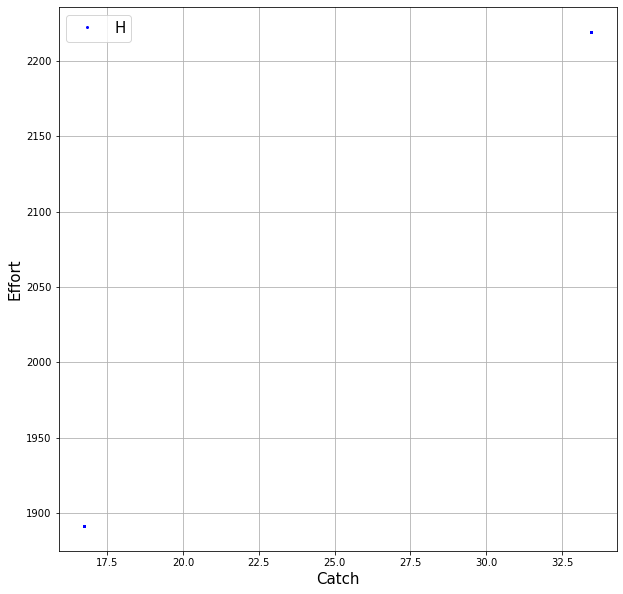

In [14]:
for i in fisheries_df_modified['gr'].unique() :
    fe.plotByGear(fisheries_df_modified, choose_gear=i)